In [160]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_columns', None)
SEED = 1234

In [161]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    from IPython.display import display
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [162]:
df = pd.read_csv("org_info.csv")
df.head()

,Unnamed: 0,Organisation name:,Founding year:,Country:,Total number of staff:,Resources dedicated to microfinance:,Percentage of microfinance activities:,Type of organisation:,,Contact person:,Address:,Email:,Website:,Phone:,Fax:,Mission:,Type of intervention:,Countries of intervention:,Areas of intervention:,Main competences:,Please indicate any innovations in your microfinance program planned for the coming year:,Foundation year:,Country of incorporation:,Environmental Microfinance Project Description:
0,1,Academy of German Cooperatives / Akademie Deut...,1973,Germany,300,8,Between 0 and 20%,Non profit,Consultants and support services (such as rati...,Ms. Isabelle Katthagen,Schloss Montabaur D-56410MontabaurGermany,Isabelle_Katthagen@adgonline.de,www.adg-international.com,+49 2602 14 158,+49 (2) 602 14 95 1 58,Managerial education and financial training pr...,Subsidies in staff time (e.g. technical assist...,AfricaAsiaEuropeSouth AmericaBrazilOceania,"Macro level: Prudential regulation, Supervisio...",Academy of German Cooperatives has special kno...,NaN,NaN,NaN,NaN
1,2,Advans Group,2005,France,61,61,100%,For profit,Consultants and support services (such as rati...,Katherine Brown,39 Rue La FayetteParisFrance,kbrown@advansgroup.com,www.advansgroup.com,01 53 32 75 75,NaN,Advans mission is to respond to the need for f...,NaN,"AfricaCameroonCongo, The Democratic Republic o...",NaN,NaN,"Over the next five years, the Advans group wil...",NaN,NaN,NaN
2,3,AFC Agriculture & Finance Consultants GmbH,1973,Germany,30,3,Between 0 and 20%,For profit,Consultants and support services (such as rati...,Mr. Johannes Buschmeier,Baundscheidtstr. 1751113BonnGermany,Johannes.buschmeier@afci.de,www.afci.de,+49 228 98 57 960,+49 228 98 57 979,Our mission: AFC provides competent consulting...,NaN,Programmes open to all regions.,"Macro level: Prudential regulation, Supervisio...",NaN,NaN,NaN,NaN,NaN
3,4,Agence Française de Développement,1942,France,1 500,4,Between 0 and 20%,Non profit,"Government agency, French bilateral developmen...",Christine Poursat,"5, rue Roland BarthesF-75598Paris, Cedex 12France",poursatc@afd.fr,www.afd.fr,+33 (1) 5344 3087,+33 (1) 5344 3733,AFD has differentiated geographical mandates:\...,EquityLoansGuaranteesSubsidies / donations in ...,AfricaAsiaSouth AmericaBrazilColombiaDominican...,"Macro level: Prudential regulation, Supervisio...",We are particularly renowned for our capacity ...,This year the main areas of intervention are:\...,NaN,NaN,NaN
4,5,Agencia Española de Cooperación Internacional ...,1988,Spain,800,6,Between 20 and 50%,Non profit,Government agency,Mr. Fernando Jiménez-Ontiveros,Av Reyes Católicos 4ES-28040MadridSpain,fernando.jimenezontiveros@aecid.es,www.aecid.es,+34 (91) 583 8493,+34 (91) 583 8131,Contribute to reducing poverty in developing c...,EquityLoansDonations for technical assistance ...,AfricaAngolaBeninBotswanaBurkina FasoBurundiCa...,"Intermediate level: Rural finance, Microfinanc...",Combating poverty is the main goal of the Span...,NaN,NaN,NaN,NaN


In [163]:
# Drop non informative column
df = df.drop(columns=["Unnamed: 0"])

In [164]:
# Renaming columns because of bad formatting
df.columns = ['Organisation name', 'Founding year', 'Country',
       'Total number of staff', 'Resources dedicated to microfinance',
       'Percentage of microfinance activities', 'Profit',
       'Type of organisation', 'Contact person', 'Address', 'Email', 'Website', 'Phone',
       'Fax', 'Mission', 'Type of intervention',
       'Countries of intervention', 'Areas of intervention',
       'Main competences',
       'Planned investments',
       'Foundation year', 'Country of incorporation',
       'Environmental Microfinance Project Description']

In [165]:
# Organisation name is not useful for analytics. It's better used as row ID.
df = df.set_index('Organisation name')

In [166]:
# Remove info not useful for analytics
df = df.drop(columns=["Contact person", "Address", "Email", "Website", "Phone", "Fax"])

In [167]:
# Show null values ratio for every column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df

,percent_missing
Foundation year,99.009901
Country of incorporation,99.009901
Environmental Microfinance Project Description,99.009901
Planned investments,44.554455
Main competences,32.673267
Type of intervention,22.772277
Areas of intervention,17.821782
Resources dedicated to microfinance,14.851485
Total number of staff,3.960396
Founding year,0.000000


In [168]:
# Remove columns mostly filled with NaN
df = df.drop(columns=['Foundation year', 'Country of incorporation',
       'Environmental Microfinance Project Description'])

In [169]:
# Some elements have additional text/specification after the Founding Year value
# We get rid of it
df['Founding year'] = df['Founding year'].str[0:4]

In [170]:
# Remove /n characters from data
df = df.replace('\n',' ', regex=True)

In [171]:
# Inspect column dtypes
df.dtypes

Founding year                            object
Country                                  object
Total number of staff                    object
Resources dedicated to microfinance      object
Percentage of microfinance activities    object
Profit                                   object
Type of organisation                     object
Mission                                  object
Type of intervention                     object
Countries of intervention                object
Areas of intervention                    object
Main competences                         object
Planned investments                      object
dtype: object

In [172]:
# Change numerical values to Nullable Integers (must convert to 'float' before 
# doing so, becuase of a bug in Pandas)

df['Founding year'] = df['Founding year'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['Total number of staff'] = df['Total number of staff'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())
df['Resources dedicated to microfinance'] = df['Resources dedicated to microfinance'].apply(pd.to_numeric, errors='coerce').astype(pd.Int64Dtype())

In [173]:
# Set categorical classes
df = df.astype({'Country': "category",
                'Profit': "category"})

In [174]:
# Change "percentage of microfinance activities" into a numerical (float) value:
# the range midpoint.

df['Percentage of microfinance activities'] = df['Percentage of microfinance activities'].replace({'Between ': '', '%': ''}, regex=True)
df[['From','To']] = df['Percentage of microfinance activities'].str.split(' and ', expand=True)
df['To'].fillna(df.From, inplace=True)
df['Percentage of microfinance activities'] = (df.From.apply(lambda x: float(x)) + df.To.apply(lambda x: float(x)))/ 2
df = df.drop(columns=["From", "To"])

In [175]:
# Dealing with inclusive, multiclass variables
# We want to "featurize" the "Countries of intervention" variable

cols = ['Africa', 'Asia','Europe', 'Oceania', 'South America', 'North America']
ALL = '|Programmes open to all regions.'
for col in cols:
    df[col] = np.where(df['Countries of intervention'].str.contains(col+ALL, regex=True), 1, 0)
df = df.drop(columns=['Countries of intervention'])

In [176]:
# Split the "Area of intervention" values into 4 new variables: Macro, Intermediate, Micro and Other
#
# Transformation goes like this: 
# "Macro level: Prudential regulationIntermediate level: Rural financeMicro level: Marketing"
# becomes
# df['AoI Macro'] = 'Prudential regulation'
# df['AoI Intermediate'] = 'Rural finance'
# etc...

AoI = [('AoI Macro','Macro level: '), ('AoI Intermediate','Intermediate level: '), ('AoI Micro','Micro level: '), ('AoI Other','Other themes: ')]
for area in AoI:
    df[area[0]] = df['Areas of intervention'].str.extract(r'(?<='+ area[1] + ')(.*?)(?=Intermediate level:|Micro level:|Other themes:|$)')


In [177]:
# "Type of intervention" is bad formatted.
# Transformation goes like this: EquityLoansGuarantees -> Equity, Loans, Guarantees

def try_join(line):
    try:
        return ', '.join(map(str, line))
    except TypeError:
        return np.nan
    

df['Type of intervention'] = df['Type of intervention'].str.split(r'(?<=[a-z]|[)])(?=[A-Z])')
df['Type of intervention'] = [try_join(line) for line in df['Type of intervention']]
df.head()

,Founding year,Country,Total number of staff,Resources dedicated to microfinance,Percentage of microfinance activities,Profit,Type of organisation,Mission,Type of intervention,Areas of intervention,Main competences,Planned investments,Africa,Asia,Europe,Oceania,South America,North America,AoI Macro,AoI Intermediate,AoI Micro,AoI Other
Organisation name,,,,,,,,,,,,,,,,,,,,,,
Academy of German Cooperatives / Akademie Deutscher Genossenschaften,1973,Germany,300,8,10.0,Non profit,Consultants and support services (such as rati...,Managerial education and financial training pr...,Subsidies in staff time (e.g. technical assist...,"Macro level: Prudential regulation, Supervisio...",Academy of German Cooperatives has special kno...,NaN,1,1,1,1,1,0,"Prudential regulation, Supervision, Supporting...","Rural finance, Value chain development, Busine...","Financial product development and innovation, ...","Sector mapping, Feasibility studies"
Advans Group,2005,France,61,61,100.0,For profit,Consultants and support services (such as rati...,Advans mission is to respond to the need for f...,NaN,NaN,NaN,"Over the next five years, the Advans group wil...",1,1,0,0,0,0,NaN,NaN,NaN,NaN
AFC Agriculture & Finance Consultants GmbH,1973,Germany,30,3,10.0,For profit,Consultants and support services (such as rati...,Our mission: AFC provides competent consulting...,NaN,"Macro level: Prudential regulation, Supervisio...",NaN,NaN,1,1,1,1,1,1,"Prudential regulation, Supervision, Interest r...","Community-based finance solutions, Rural finan...","Financial product development and innovation, ...","Impact and performances studies, Sector mappin..."
Agence Française de Développement,1942,France,<NA>,4,10.0,Non profit,"Government agency, French bilateral developmen...",AFD has differentiated geographical mandates: ...,"Equity, Loans, Guarantees, Subsidies / donatio...","Macro level: Prudential regulation, Supervisio...",We are particularly renowned for our capacity ...,This year the main areas of intervention are: ...,1,1,0,0,1,0,"Prudential regulation, Supervision, Interest r...","Rural finance, Microfinance investment vehicul...","Capital/equity investments, Financial product ...","Academic research, Impact and performances stu..."
Agencia Española de Cooperación Internacional para el Desarrollo (AECID),1988,Spain,800,6,35.0,Non profit,Government agency,Contribute to reducing poverty in developing c...,"Equity, Loans, Donations for technical assista...","Intermediate level: Rural finance, Microfinanc...",Combating poverty is the main goal of the Span...,NaN,1,1,0,0,1,0,NaN,"Rural finance, Microfinance investment vehicul...","Financial product development and innovation, ...",NaN


**Key word extraction**

In [178]:
from nltk import tokenize
from operator import itemgetter
import math
from datetime import datetime


**Influence Computation** Attribute an influence value to every company following this formula : log10(alpha(staff x ressource² x age)) 

In [179]:
### Compute the age of a company
def getAge(index, data):
    return (datetime.now().year - data["Founding year"][index])

print(getAge(1, df))

16


In [180]:
def getInfluenceScore(index, df):
    age = getAge(index, df)
    staff = df["Total number of staff"][index]
    ressources = df["Resources dedicated to microfinance"][index]
    alpha = df["Percentage of microfinance activities"][index]/100

   
    if (not(pd.notna(staff)) or not(pd.notna(ressources)) or not(pd.notna(alpha)) or not(pd.notna(age))):
        return

    return (math.log((alpha*staff*ressources*ressources*age),10))

def computeAllInfluence (df):
    cpy = df 
    listInf = []
    for i in range(len(cpy)) :
        listInf.append(getInfluenceScore(i,cpy))
    
    cpy['Influence'] = listInf
    
    return cpy


In [181]:
df = computeAllInfluence(df)
df

,Founding year,Country,Total number of staff,Resources dedicated to microfinance,Percentage of microfinance activities,Profit,Type of organisation,Mission,Type of intervention,Areas of intervention,Main competences,Planned investments,Africa,Asia,Europe,Oceania,South America,North America,AoI Macro,AoI Intermediate,AoI Micro,AoI Other,Influence
Organisation name,,,,,,,,,,,,,,,,,,,,,,,
Academy of German Cooperatives / Akademie Deutscher Genossenschaften,1973,Germany,300,8,10.0,Non profit,Consultants and support services (such as rati...,Managerial education and financial training pr...,Subsidies in staff time (e.g. technical assist...,"Macro level: Prudential regulation, Supervisio...",Academy of German Cooperatives has special kno...,NaN,1,1,1,1,1,0,"Prudential regulation, Supervision, Supporting...","Rural finance, Value chain development, Busine...","Financial product development and innovation, ...","Sector mapping, Feasibility studies",4.964542
Advans Group,2005,France,61,61,100.0,For profit,Consultants and support services (such as rati...,Advans mission is to respond to the need for f...,NaN,NaN,NaN,"Over the next five years, the Advans group wil...",1,1,0,0,0,0,NaN,NaN,NaN,NaN,6.560109
AFC Agriculture & Finance Consultants GmbH,1973,Germany,30,3,10.0,For profit,Consultants and support services (such as rati...,Our mission: AFC provides competent consulting...,NaN,"Macro level: Prudential regulation, Supervisio...",NaN,NaN,1,1,1,1,1,1,"Prudential regulation, Supervision, Interest r...","Community-based finance solutions, Rural finan...","Financial product development and innovation, ...","Impact and performances studies, Sector mappin...",3.112605
Agence Française de Développement,1942,France,<NA>,4,10.0,Non profit,"Government agency, French bilateral developmen...",AFD has differentiated geographical mandates: ...,"Equity, Loans, Guarantees, Subsidies / donatio...","Macro level: Prudential regulation, Supervisio...",We are particularly renowned for our capacity ...,This year the main areas of intervention are: ...,1,1,0,0,1,0,"Prudential regulation, Supervision, Interest r...","Rural finance, Microfinance investment vehicul...","Capital/equity investments, Financial product ...","Academic research, Impact and performances stu...",NaN
Agencia Española de Cooperación Internacional para el Desarrollo (AECID),1988,Spain,800,6,35.0,Non profit,Government agency,Contribute to reducing poverty in developing c...,"Equity, Loans, Donations for technical assista...","Intermediate level: Rural finance, Microfinanc...",Combating poverty is the main goal of the Span...,NaN,1,1,0,0,1,0,NaN,"Rural finance, Microfinance investment vehicul...","Financial product development and innovation, ...",NaN,5.521974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Verdant Capital Limited,2013,Mauritius,12,8,60.0,For profit,Investor,African impact-oriented investment advisory fi...,"Equity, Loans","Macro level: Due diligence, advice on capital ...","Due diligence, advice on preparation for and ...",Provide hybrid capital and technical assist...,1,0,0,0,0,0,"Due diligence, advice on capital raising, capi...","Rural finance, Value chain development, Microf...",Interventions focused on individual MF practit...,"Due diligence, advice on capital raising, capi...",3.566602
VisionFund International,2003,United States,<NA>,<NA>,100.0,Non profit,"NGO, Network/Association/Platform",Mission We believe in brighter futures for chi...,"Loans, savings insurance and client education ...","Macro level: Prudential regulation, Supervisio...",Risk Management Women-focused impact delivery...,Value chains Services to the ultra poor Agric...,1,1,1,0,1,0,"Prudential regulation, Supervision, Interest r...","Community-based finance solutions, Rural finan...","Capital/equity investments, Non-prudential reg...",NaN,NaN
Women’s World Banking,1976,United States,50,35,100.0,Non profit,"NGO, Network/Association/Platform",Women’s Wor

**Interest Computation** One possible model to quantify the interest we show to a company is could be by studying certain similarity we share. We can think of keyword analysis

In [182]:
from nltk import tokenize
from operator import itemgetter
import math

#Remove Stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /Users/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [183]:
# Relevent String Sequence : Mission / Type of intervention / Area of intervention / Main competences / Please indicate any innovations in your microfinance program planned for the coming year
def getStringSequence(df, index):

    mission = df["Mission"][index] if pd.notna(df["Mission"][1]) else ''
    ToI = df["Type of intervention"][index] if pd.notna(df["Type of intervention"][index]) else ''
    AoI = df["Areas of intervention"][index] if pd.notna(df["Areas of intervention"][index]) else ''
    mainCptnc = df["Main competences"][index] if pd.notna(df["Main competences"][index]) else ''
    innov = df["Planned investments"][index] if pd.notna(df["Planned investments"][index]) else ''

    toAnalyze = mission + ToI + AoI + mainCptnc + innov
    
    return toAnalyze


In [184]:
def countWords(doc):
    total_words = doc.split()
    total_word_length = len(doc)
    return (total_word_length)


def countSentence(doc): 
    total_sentences = tokenize.sent_tokenize(doc)
    total_sent_len = len(total_sentences)
    return total_sent_len




In [185]:
# Calculate TF for each word
def computeTF(doc):
    tf = {}
    for word in doc.split() :
        word = word.replace('.','')
        if word not in stop_words:
            if word in tf:
                tf[word] += 1
            else:
                tf[word] = 1

    tf.update((x, y/int(countWords(doc))) for x, y in tf.items())
    return tf

def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

# Calculate IDF
def computeIDF(doc):
    idf = {}
    for word in doc.split():
        word = word.replace('.','')
        if word not in stop_words:
            if word in idf:
                idf[word] = check_sent(word, tokenize.sent_tokenize(doc))
            else:
                idf[word] = 1

    # Performing a log and divide
    idf.update((x, math.log(int(countSentence(doc))/y)) for x, y in idf.items())

    return idf

# TF * IDF 
def computeTFIDF(doc):
    idf = computeIDF(doc)
    tf = computeTF(doc)

    tf_idf = {key: tf[key] * idf.get(key, 0) for key in tf.keys()}

    return tf_idf


In [186]:
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result


**Latent Dirichlet Allocation**
We extract the text content from *Mission*, *Main competences* and *Planned investments* variables. For each of these variables we build a corpus containing all the entries from every row. We feed the corpus to the LDA algorithm and plot the result. Using a clustering method we choose the hyperparameters that would give us the best clusters.

In [194]:
mission = df["Mission"].map(str)
mainCptnc = df["Main competences"].map(str)
innov = df["Planned investments"].map(str)

toAnalyze = mission + " " + mainCptnc + " " + innov

In [195]:
import sklearn as skl
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# preprocess words, getting rid of punctuation etc..
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# every word is mapped to its root (eg. eating -> eat)
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

data_words = list(sent_to_words(toAnalyze.fillna("")))

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [196]:
#Vectorize data
vectorizer = CountVectorizer(analyzer='word',       
                             max_df=0.9,                        # max freq occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  4.043359131944065 %


In [209]:
from sklearn.model_selection import KFold

list_n_topics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
log = []
perp = []
rpc = []

#kf = KFold(n_splits=10, random_state=SEED, shuffle=True)

for idx, n_topics in enumerate(list_n_topics):
    lda_model = LatentDirichletAllocation(n_components=n_topics)

    log_mean = 0
    perp_mean = 0

    for fit_index, val_index in [(data_vectorized, data_vectorized)]: #kf.split(data_vectorized):
        data_fit = fit_index #data_vectorized[fit_index]
        data_val = val_index #data_vectorized[val_index]
        lda_model.fit(data_fit)
        
        # Log Likelyhood: Higher the better
        log_mean = log_mean + lda_model.score(data_val)

        # Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
        perp_mean = perp_mean + lda_model.perplexity(data_val)
   
    log_mean = log_mean / 1
    perp_mean = perp_mean / 1

    log.append(log_mean)
    perp.append(perp_mean)

    # Rate of perplexity change. RPC = (Perp_(i) - Perp_(i-1))/(n_topics_(i) - n_topics_(i-1))
    # Model selected is the the first i that satisfies RPC(i)<RPC(i+1)
    ratePC = (perp[idx] - perp[idx-1]) / (list_n_topics[idx] - list_n_topics[idx-1]) if idx != 0 else 0
    rpc.append(ratePC)
    
    print("Components: " + str(n_topics))
    print("Log Likelihood: ", log_mean)
    print("Perplexity: ", perp_mean)
    print("Rate of perplexity change: ", ratePC)
    print("")


Components: 1
Log Likelihood:  -69047.49939632356
Perplexity:  865.5758296389938
Rate of perplexity change:  0

Components: 2
Log Likelihood:  -69298.21260031265
Perplexity:  887.0958536493898
Rate of perplexity change:  21.520024010396014

Components: 3
Log Likelihood:  -69750.61440207536
Perplexity:  927.2906536744151
Rate of perplexity change:  40.1948000250253

Components: 4
Log Likelihood:  -70169.89199897488
Perplexity:  966.1667783656061
Rate of perplexity change:  38.87612469119097

Components: 5
Log Likelihood:  -70267.10688260212
Perplexity:  975.4110154608611
Rate of perplexity change:  9.244237095255016

Components: 6
Log Likelihood:  -70594.59616812783
Perplexity:  1007.2079991212144
Rate of perplexity change:  31.79698366035325

Components: 7
Log Likelihood:  -70691.41081457105
Perplexity:  1016.8050526753813
Rate of perplexity change:  9.597053554166905

Components: 8
Log Likelihood:  -70851.66181092245
Perplexity:  1032.891800579436
Rate of perplexity change:  16.086747

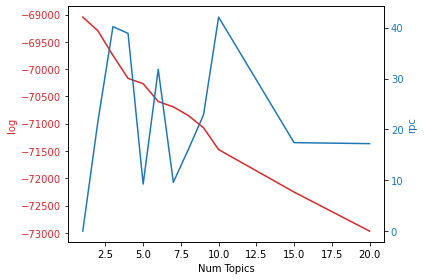

In [210]:
# Show graph
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('log', color=color)
ax1.plot(list_n_topics, log, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rpc', color=color)  # we already handled the x-label with ax1
ax2.plot(list_n_topics, rpc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Loading dataset...
done in 0.000s.
Extracting tf-idf features for NMF...
done in 0.021s.
Extracting tf features for LDA...
done in 0.014s.

Fitting the NMF model (Frobenius norm) with tf-idf features
done in 0.024s.


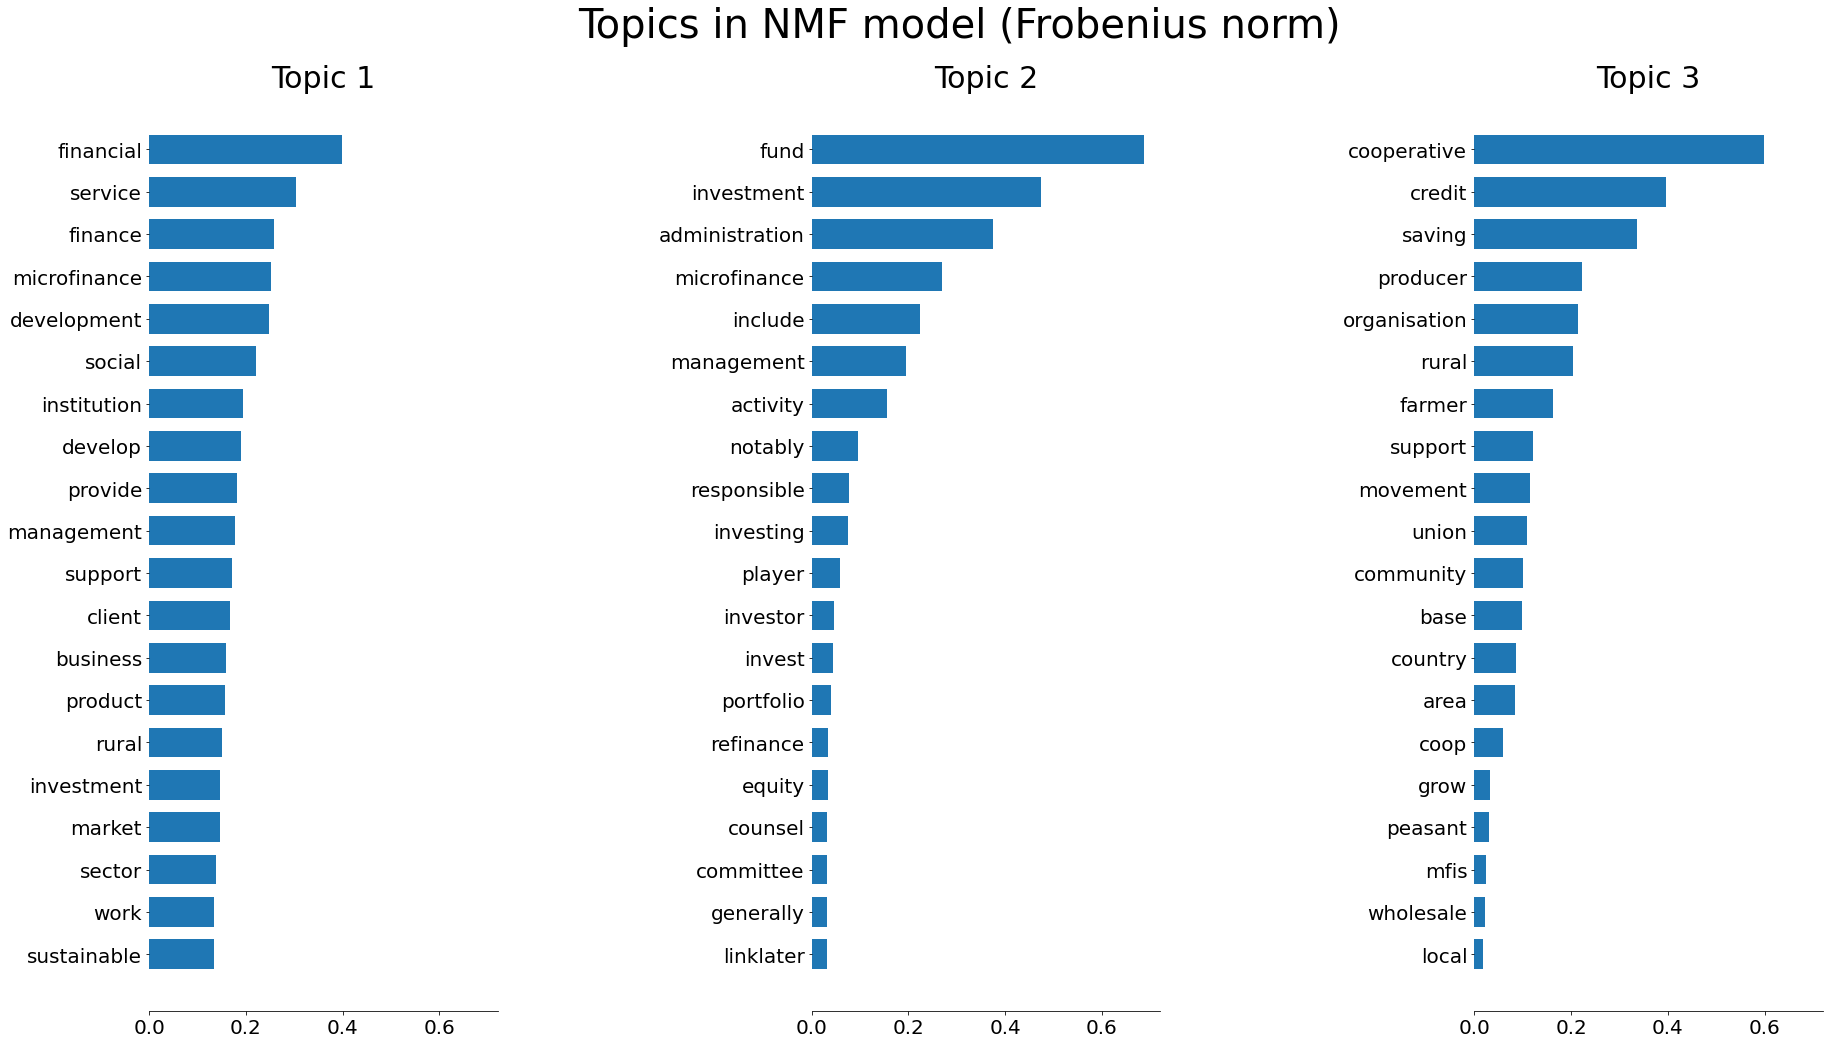



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features
done in 0.144s.


/usr/local/Caskroom/miniconda/base/envs/I-E7.2/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


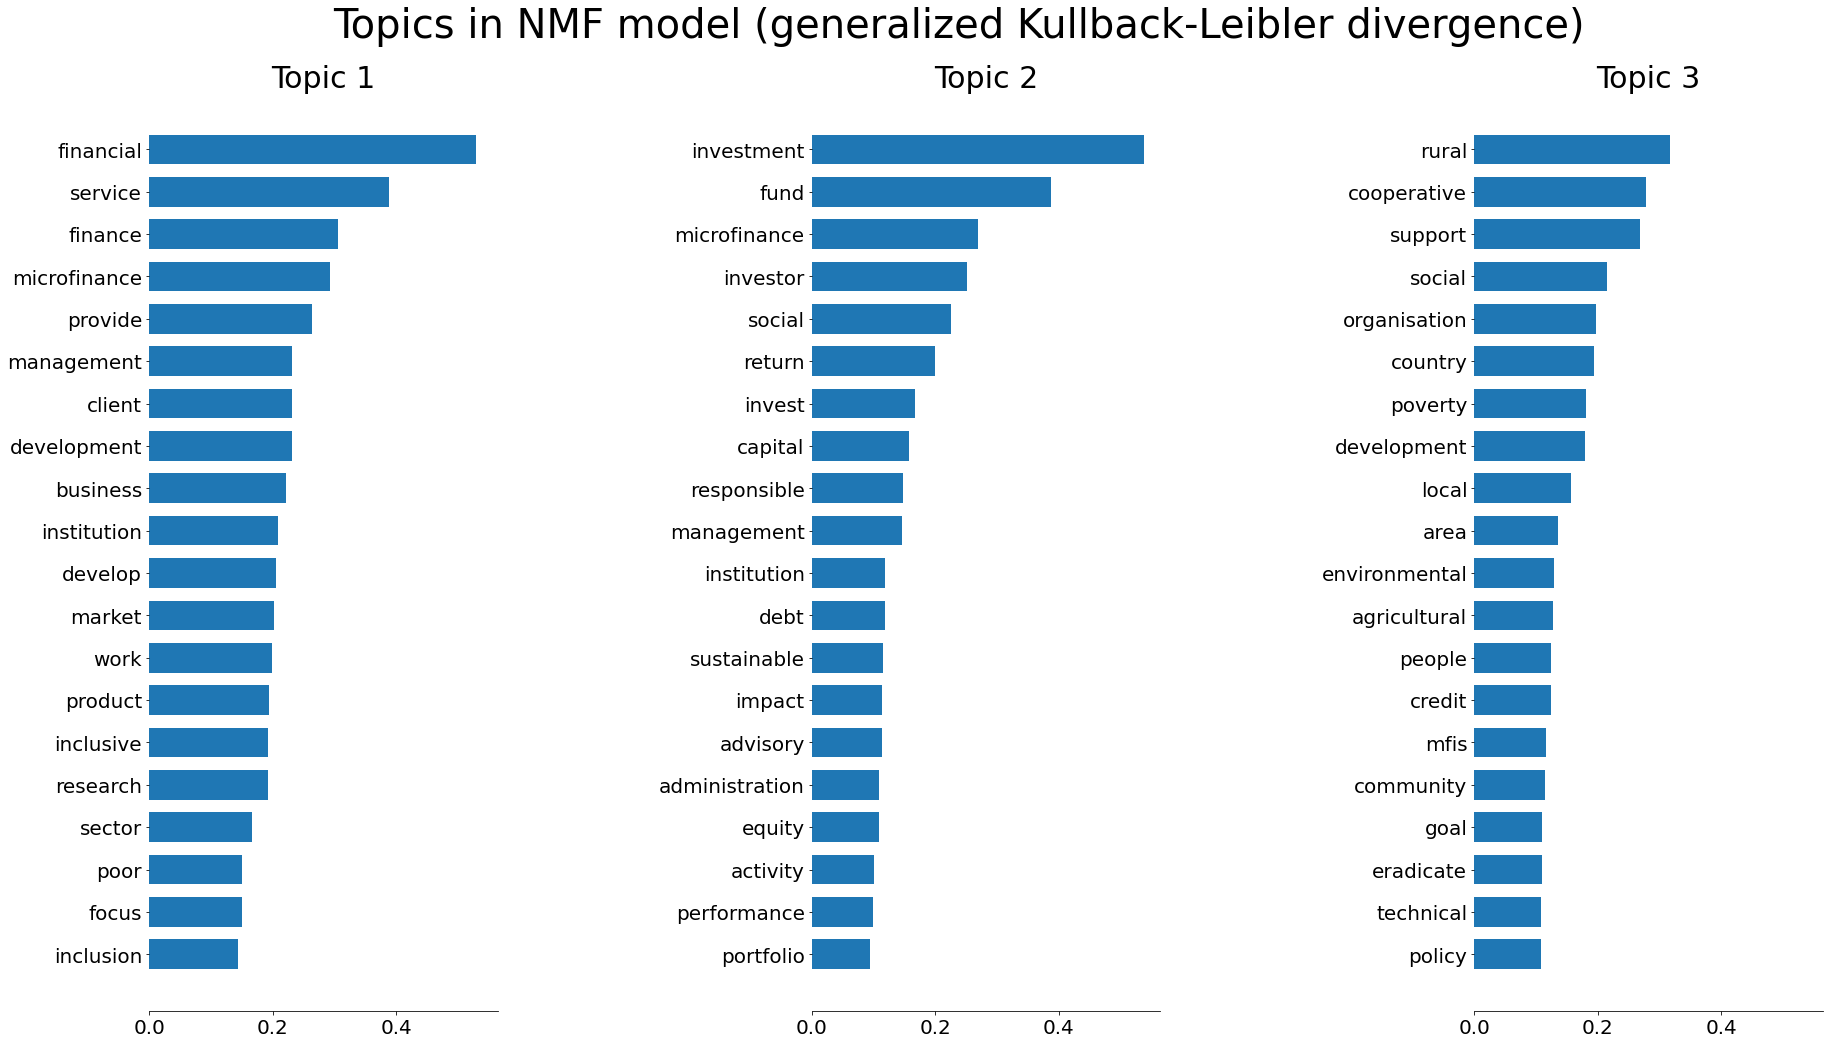



 Fitting LDA models with tf features
done in 0.321s.


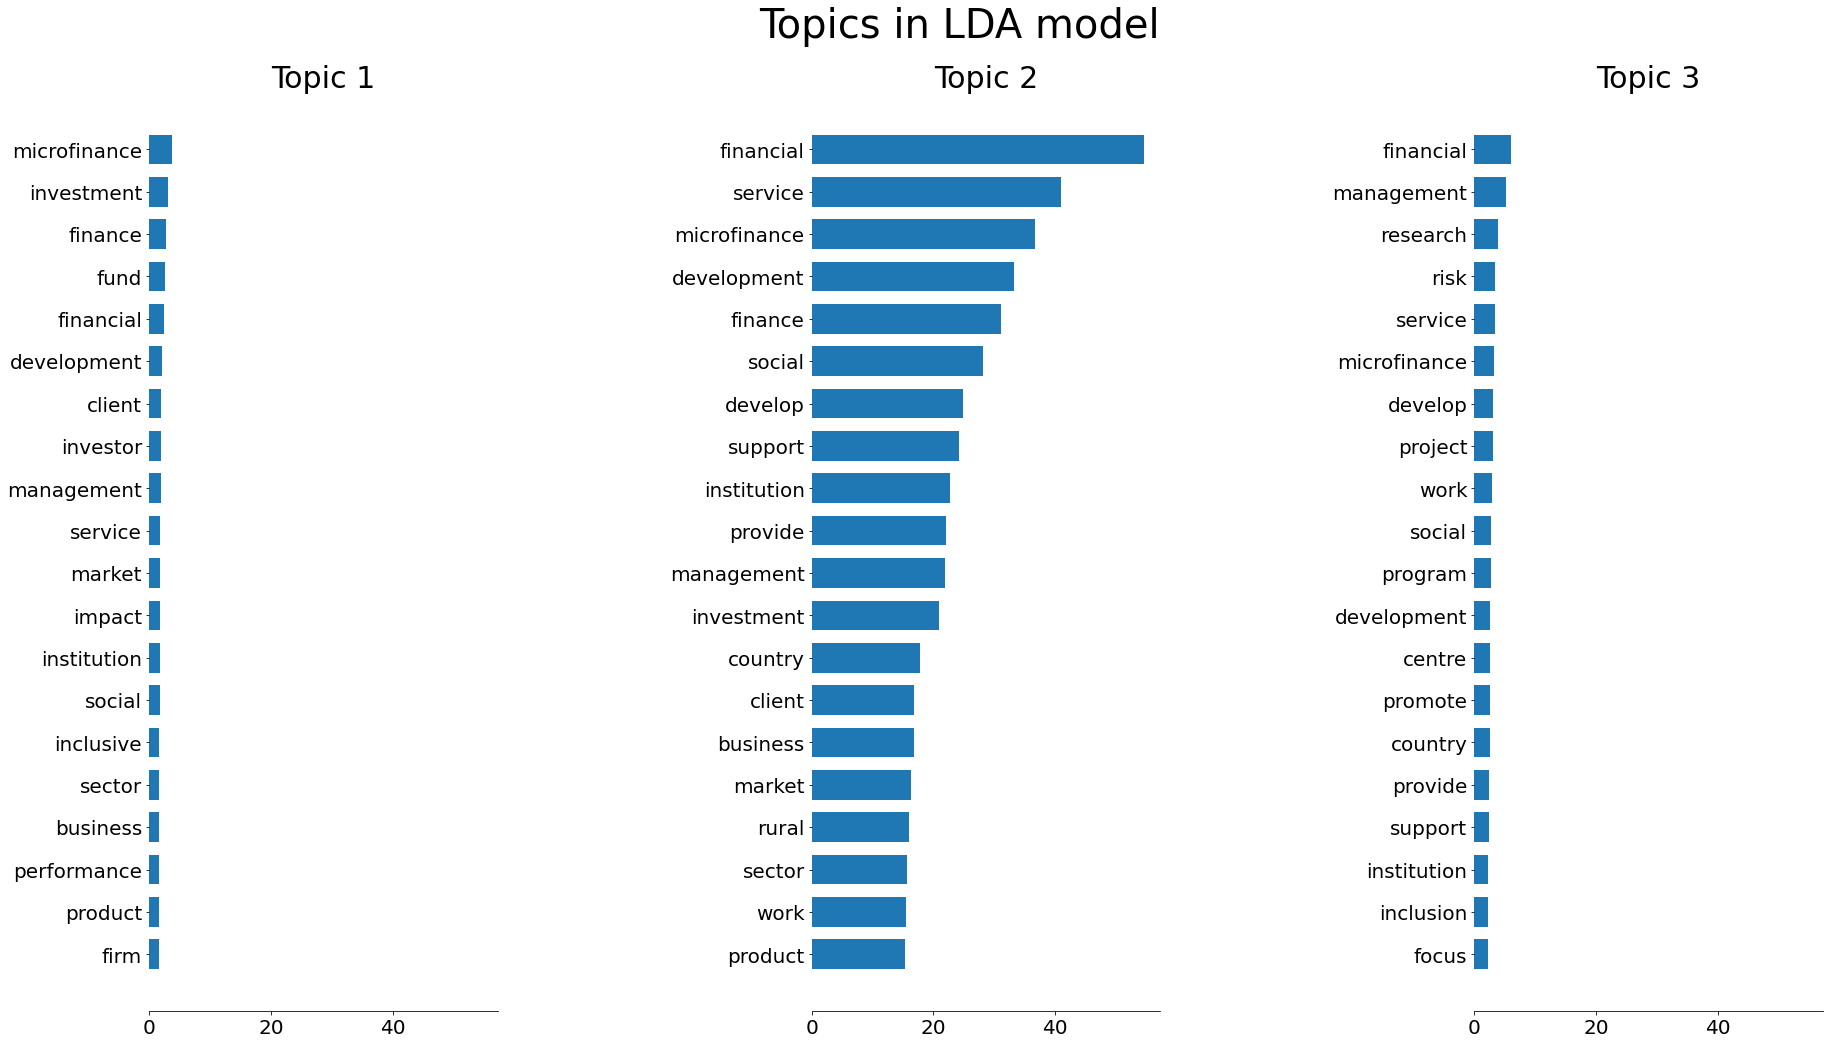

In [215]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


n_components = 3
n_top_words = 20



def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data_samples = df.Mission
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features")
t0 = time()
nmf = NMF(n_components=n_components, random_state=SEED,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm)')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features")
t0 = time()
nmf = NMF(n_components=n_components, random_state=SEED,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

print('\n' * 2, "Fitting LDA models with tf features")
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=SEED)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

In [ ]:
# Three topics can be identified: Standard, Development & Research, Developing Countries